In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats as spy
import matplotlib.pyplot as plt

In [156]:
#set file path to data and saving figures
file_path = ('/Users/spicious/Documents/GitHub/ben_project_1/clean_master_merge.csv')
save_path = ('/Users/spicious/Documents/GitHub/figs/anxious.png')
save_path2 = ('/Users/spicious/Documents/GitHub/figs/region_week.png')

In [144]:
#read csv to dataframe
df = pd.read_csv(file_path)

In [4]:
#Drop unneeded columns
df = df.drop(['SCRAM', 'RRACE.1','EEDUC.1'], axis=1)

In [5]:
#Create subset of dataframe that I want to work with
df2 = df[['DOWN', 'ANXIOUS','WORRY', 'INTEREST','WEEK']].copy()

In [6]:
#just checking
df2.count()

DOWN        659070
ANXIOUS     659070
WORRY       659070
INTEREST    659070
WEEK        659070
dtype: int64

In [7]:
#convert week column to dateTime data type
df2['WEEK'] = pd.to_datetime(df2['WEEK'])
df2

,DOWN,ANXIOUS,WORRY,INTEREST,WEEK
0,2.0,2.0,2.0,2.0,2021-12-29
1,4.0,4.0,4.0,4.0,2021-12-29
2,2.0,1.0,1.0,2.0,2021-12-29
3,2.0,2.0,1.0,2.0,2021-12-29
4,1.0,1.0,1.0,1.0,2021-12-29
...,...,...,...,...,...
659065,2.0,2.0,2.0,2.0,2022-12-09
659066,4.0,4.0,3.0,3.0,2022-12-09
659067,1.0,2.0,1.0,2.0,2022-12-09
659068,1.0,1.0,1.0,1.0,2022-12-09


In [9]:
#group data by date
df3 = df2.groupby([df2['WEEK'].dt.date]).mean()
df3

,DOWN,ANXIOUS,WORRY,INTEREST
WEEK,,,,
2021-12-29,1.704991,1.965552,1.774312,1.704521
2022-01-26,1.696726,1.939064,1.760396,1.708064
2022-03-02,1.659075,1.919311,1.744303,1.656580
2022-03-30,1.643447,1.871512,1.716805,1.641256
2022-04-27,1.631906,1.860338,1.701179,1.628033
2022-06-01,1.656589,1.923088,1.757337,1.657216
2022-06-29,1.680650,1.936925,1.769466,1.676953
2022-07-27,1.679634,1.954174,1.776905,1.684192
2022-09-14,1.706697,2.039378,1.834075,1.742342


In [12]:
#create labels for graph
labels = ('2021-12-29', '2022-01-26', '2022-03-02', '2022-03-30', '2022-04-27', '2022-06-01', '2022-06-29', '2022-07-27', '2022-09-14', '2022-10-05', '2022-11-02', '2022-12-09')

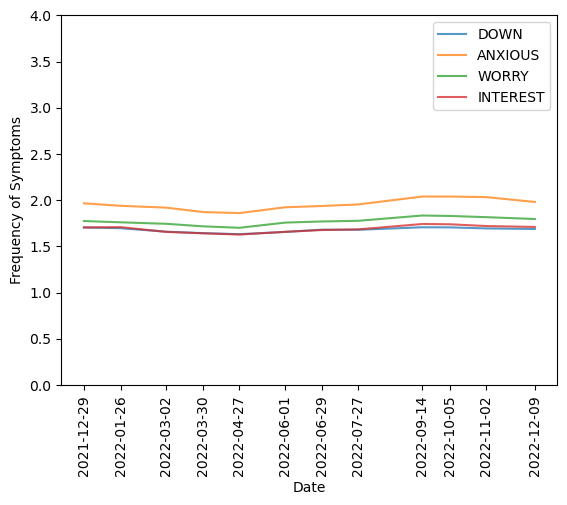

In [30]:
#create graph of Down, Anxious, Worry, and Interest over the twelve months of data
df3.plot(legend=True, xticks = labels,alpha=0.75)
plt.xticks(rotation=90)
plt.ylim(0,4)
plt.xlabel("Date")
plt.ylabel("Frequency of Symptoms")
plt.show()

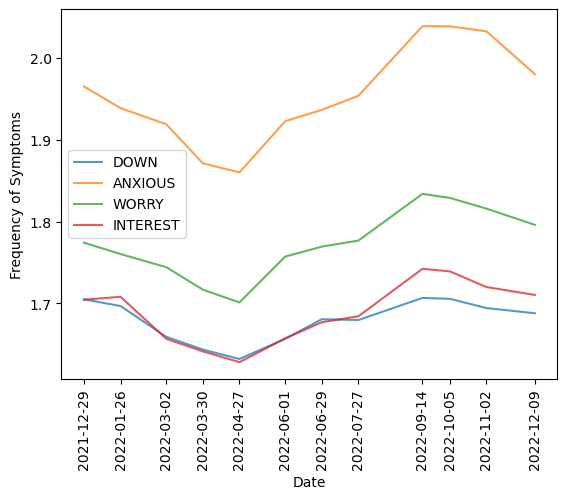

In [150]:
#differently zoomed graph
df3.plot(legend=True, xticks = labels,alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Frequency of Symptoms")

plt.show()

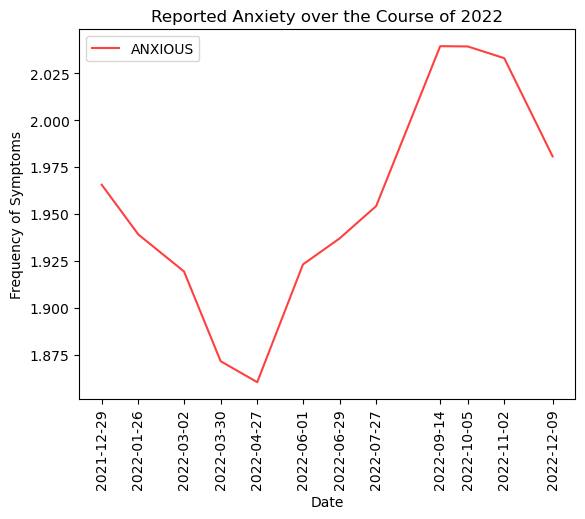

In [160]:
#create anxious only dataframe from graphing
df_anxious = df3[['ANXIOUS']].copy()
#Plot anxious dataframe to line graph
df_anxious.plot(legend=True, xticks = labels, color = 'red', alpha=0.75)
plt.title("Reported Anxiety over the Course of 2022")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Frequency of Symptoms")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [95]:
#create new subset of data to breakdown by region as well
df_region = df[['DOWN', 'ANXIOUS','WORRY', 'INTEREST','WEEK', 'REGION']].copy()
df_region['WEEK'] = pd.to_datetime(df_region['WEEK'])
df_region

,DOWN,ANXIOUS,WORRY,INTEREST,WEEK,REGION
0,2.0,2.0,2.0,2.0,2021-12-29,2
1,4.0,4.0,4.0,4.0,2021-12-29,2
2,2.0,1.0,1.0,2.0,2021-12-29,2
3,2.0,2.0,1.0,2.0,2021-12-29,2
4,1.0,1.0,1.0,1.0,2021-12-29,2
...,...,...,...,...,...,...
659065,2.0,2.0,2.0,2.0,2022-12-09,4
659066,4.0,4.0,3.0,3.0,2022-12-09,1
659067,1.0,2.0,1.0,2.0,2022-12-09,3
659068,1.0,1.0,1.0,1.0,2022-12-09,4


In [99]:
#chunk off each region into series
REGION1 = pd.DataFrame(df_region.loc[df_region.REGION == 1, :])
REGION2 = pd.DataFrame(df_region.loc[df_region.REGION == 2, :])
REGION3 = pd.DataFrame(df_region.loc[df_region.REGION == 3, :])
REGION4 = pd.DataFrame(df_region.loc[df_region.REGION == 4, :])

In [136]:
# Calculate mean of anxiety scores by region and week
REGION1mean =  REGION1.groupby([REGION1.WEEK.dt.month]).mean()["ANXIOUS"]
REGION1mean.rename("Northeast")
REGION2mean =  REGION2.groupby([REGION2.WEEK.dt.month]).mean()["ANXIOUS"]
REGION2mean.rename("South")
REGION3mean =  REGION3.groupby([REGION3.WEEK.dt.month]).mean()["ANXIOUS"]
REGION3mean.rename("Midwest")
REGION4mean =  REGION4.groupby([REGION4.WEEK.dt.month]).mean()["ANXIOUS"]
REGION4mean.rename("West")

WEEK
1     1.977320
3     1.928405
4     1.875663
6     1.941425
7     1.961967
9     2.049448
10    2.062932
11    2.035662
12    1.970967
Name: West, dtype: float64

In [123]:
# Combine series to dataframe
mean_list = (REGION1mean, REGION2mean, REGION3mean, REGION4mean)
region_week_df = pd.DataFrame(mean_list)

# Clean up dataframe
region_week_df.reset_index()
region_week_df = region_week_df.T
region_week_df.columns = ['Northeast', 'South', 'Midwest', 'West']
region_week_df


,Northeast,South,Midwest,West
WEEK,,,,
1,1.952216,1.922857,1.892595,1.977320
3,1.914850,1.892533,1.849868,1.928405
4,1.902789,1.844323,1.827364,1.875663
6,1.926553,1.936934,1.902547,1.941425
7,1.951228,1.964139,1.931098,1.961967
9,2.030865,2.054749,2.007495,2.049448
10,2.010413,2.050451,2.007229,2.062932
11,2.043911,2.048627,1.999917,2.035662
12,2.013251,1.976982,1.938629,1.970967


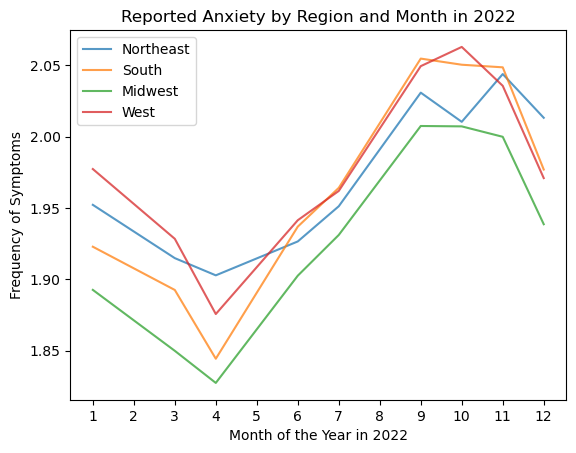

In [161]:
#plot data onto line graph
region_week_df.plot(legend=True, xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], alpha=0.75)
plt.title("Reported Anxiety by Region and Month in 2022")
plt.ylabel("Frequency of Symptoms")
plt.xlabel("Month of the Year in 2022")
plt.savefig(save_path2, bbox_inches='tight')
plt.show()